# Feature Analysis

A notebook to find example pairs of ranked specs where both specs have the same set of features. This is not good as w cannot learn a difference. 

In [27]:
from draco.learn.data_util import load_neg_pos_data, get_pos_neg_data
import json
from vega3 import VegaLite
from pprint import pprint
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
import seaborn as sns
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
raw_data = load_neg_pos_data()

In [3]:
raw_data[0]

PosNeg(data=<draco.spec.Data object at 0x117e3b198>, task=None, source='manual', negative={'mark': 'point', 'encoding': {'x': {'field': 'q1', 'type': 'quantitative'}, 'y': {'field': 'q1', 'type': 'quantitative'}}}, positive={'mark': 'point', 'encoding': {'x': {'field': 'q1', 'type': 'quantitative'}, 'y': {'field': 'q2', 'type': 'quantitative'}}})

In [4]:
data = get_pos_neg_data()

In [5]:
residual = data.positive - data.negative

##  Find pairs that are impossible to distinguish because the feature vectors are the same

In [6]:
sums = residual.abs().sum(axis=1)

In [7]:
bad = data[sums == 0]
print(len(bad))

0


In [8]:
bad.index

Int64Index([], dtype='int64')

In [9]:
# bad.positive.iloc[0]

In [10]:
# bad.negative.iloc[0]

In [11]:
# e = raw_data[bad.index[0]]
# print(e.data.to_asp())
# pprint(e.negative)
# pprint(e.positive)

## Cluster Training Data

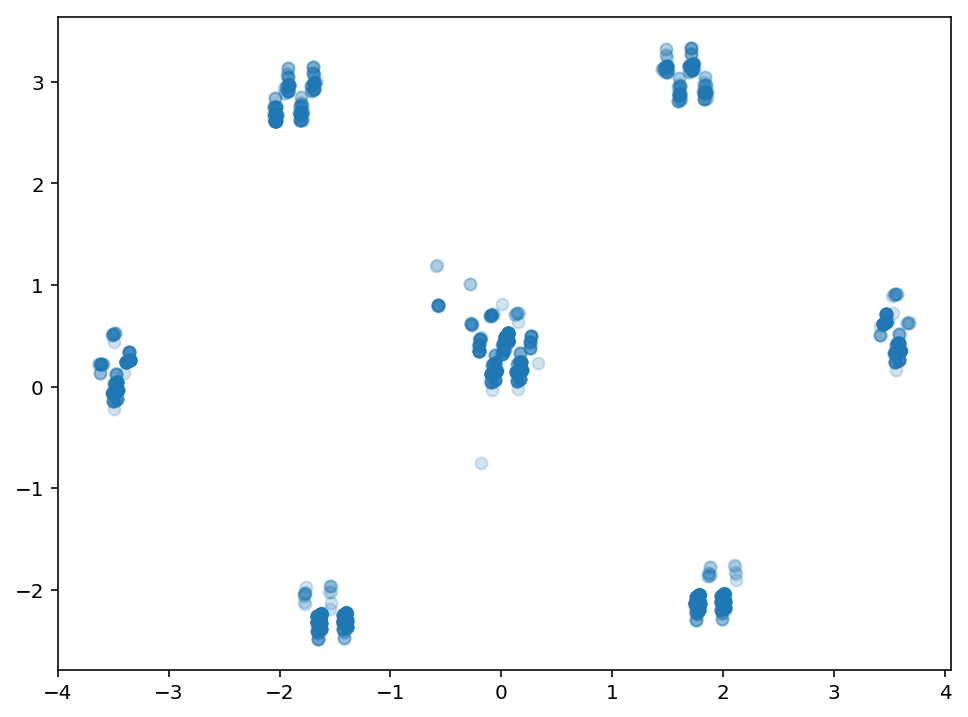

In [12]:
X = data.positive - data.negative

pca = PCA(n_components=2)
fit = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(fit[:,0], fit[:,1], alpha=0.2)

In [13]:
model = KMeans(n_clusters=7)
# model = SpectralClustering(n_clusters=7)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
df = pd.DataFrame(fit[:,:2], columns=['x0', 'x1'])
df['cluster'] = model.labels_
df['source'] = data.source
df['task'] = data.task

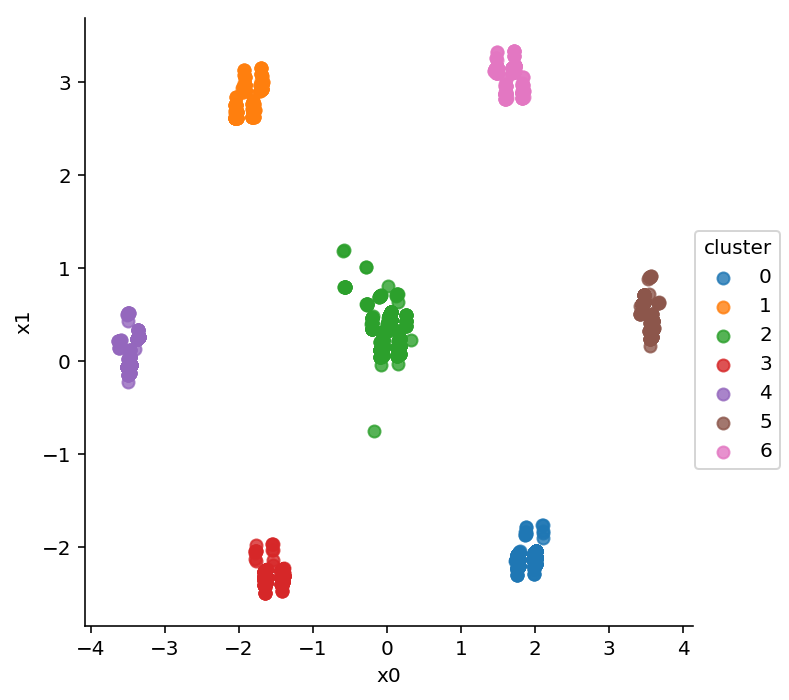

In [15]:
sns.lmplot(x='x0', y='x1', data=df, hue='cluster', fit_reg=False)

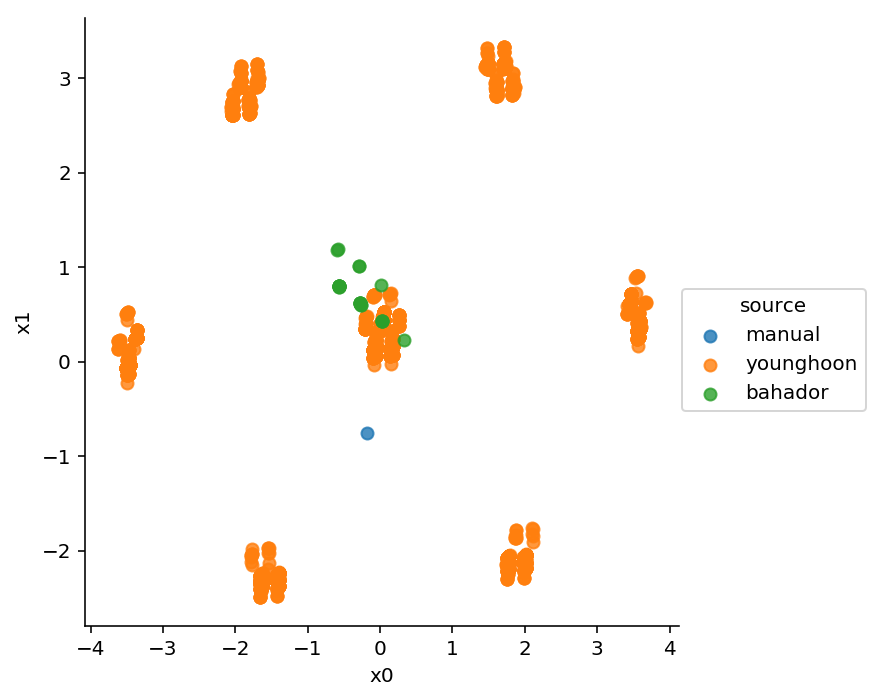

In [16]:
sns.lmplot(x='x0', y='x1', data=df, hue='source', fit_reg=False)

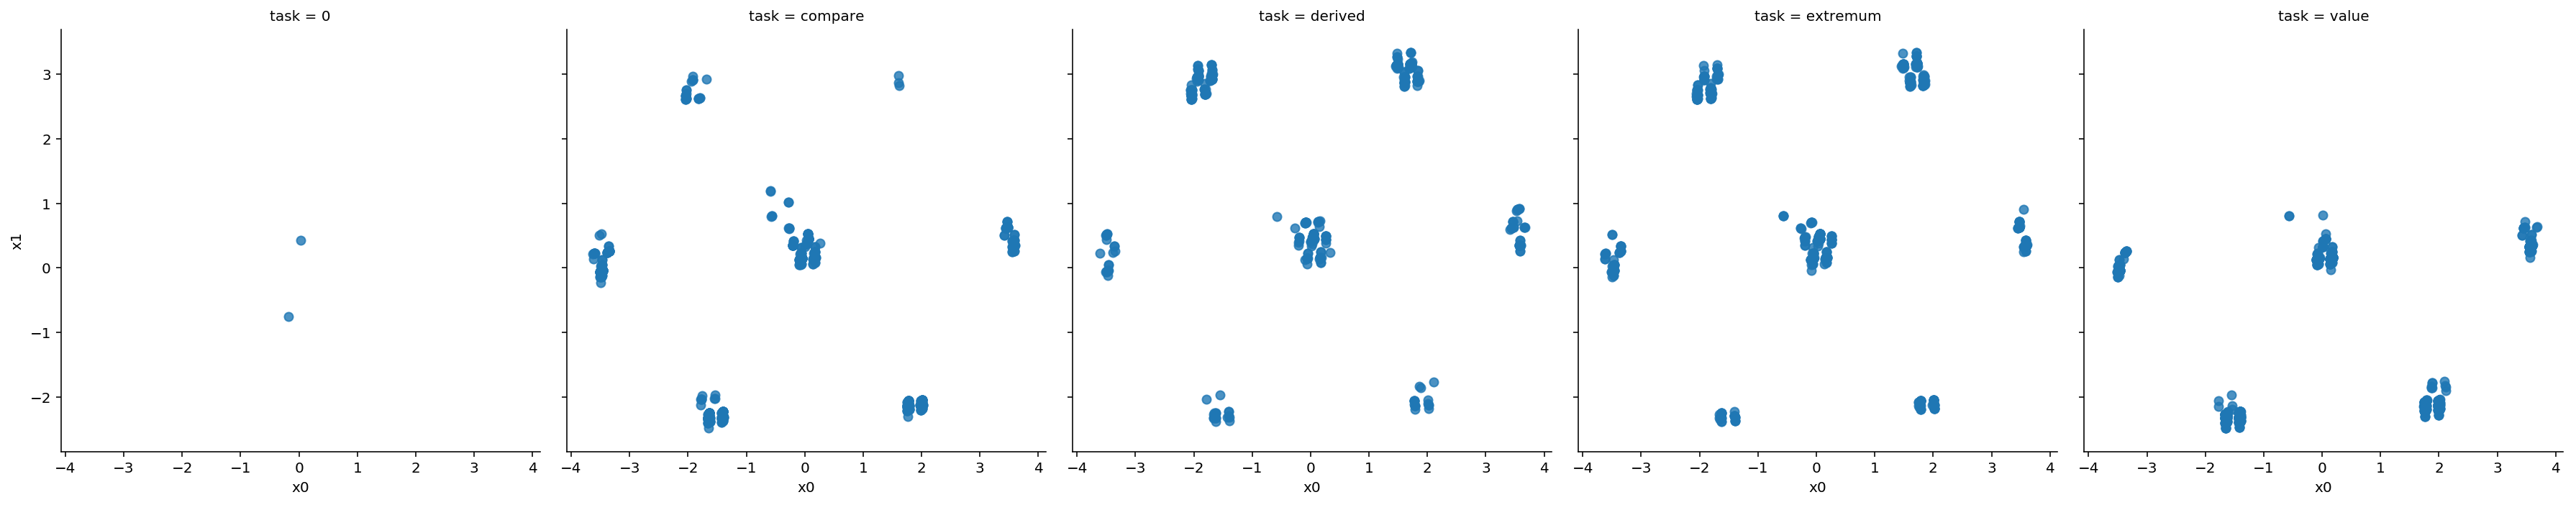

In [17]:
sns.lmplot(x='x0', y='x1', data=df, col='task', fit_reg=False)

In [18]:
vals = [{
    'q1': round(random.normalvariate(2, 2), 3),
    'q2': round(random.normalvariate(2, 2), 3),
    'n': random.randint(0,7)
} for _ in range(10)]

In [19]:
i = df[df.cluster == 0].index[0]
pair = raw_data[i]
i

29

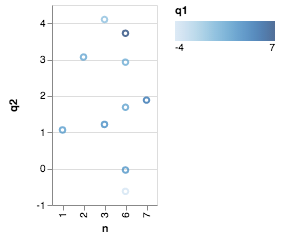

In [20]:
spec = pair.negative
spec['data'] = {
    'values': vals
}

VegaLite(spec)

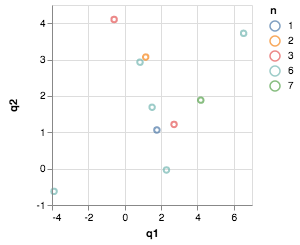

In [21]:
spec = pair.positive
spec['data'] = {
    'values': vals
}

VegaLite(spec)

## Leverage weight

In [22]:
u, s, vh = np.linalg.svd(X, full_matrices=False)
leverage = np.sum(np.square(u), axis=1)**2

In [23]:
leverage.argmax()

6

In [24]:
raw_data[leverage.argmax()]

PosNeg(data=<draco.spec.Data object at 0x118ceb588>, task='compare', source='younghoon', negative={'mark': 'point', 'encoding': {'color': {'field': 'q1', 'type': 'quantitative', 'scale': {'zero': True}}, 'x': {'field': 'q2', 'type': 'quantitative', 'scale': {'zero': True}}, 'y': {'field': 'n', 'type': 'nominal'}}}, positive={'mark': 'point', 'encoding': {'y': {'field': 'q1', 'type': 'quantitative', 'scale': {'zero': True}}, 'color': {'field': 'q2', 'type': 'quantitative', 'scale': {'zero': True}}, 'x': {'field': 'n', 'type': 'nominal'}}})

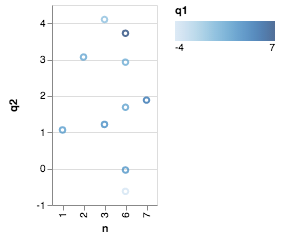

In [25]:
spec = pair.negative
spec['data'] = {
    'values': vals
}

VegaLite(spec)

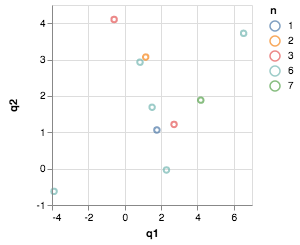

In [26]:
spec = pair.positive
spec['data'] = {
    'values': vals
}

VegaLite(spec)